In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv('American_Housing_Data_20231209.csv')
data

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39976,98199,2495000.0,4,4,3380,2626 27TH AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39977,98199,2295000.0,4,4,2878,3215 32ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39978,98199,950000.0,3,2,1380,3257 22ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39979,98199,425000.0,2,1,856,3711 26TH PL W APT 102,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


In [3]:
data.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


In [4]:
data.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    2
Latitude                   0
Longitude                  0
dtype: int64

In [5]:
data.columns

Index(['Zip Code', 'Price', 'Beds', 'Baths', 'Living Space', 'Address', 'City',
       'State', 'Zip Code Population', 'Zip Code Density', 'County',
       'Median Household Income', 'Latitude', 'Longitude'],
      dtype='object')

In [6]:
data.drop('Address', axis=1, inplace = True)

In [7]:
data

,Zip Code,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39976,98199,2495000.0,4,4,3380,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39977,98199,2295000.0,4,4,2878,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39978,98199,950000.0,3,2,1380,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39979,98199,425000.0,2,1,856,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


In [8]:
data['Median Household Income'] = data['Median Household Income'].fillna(data['Median Household Income'].mean())

In [9]:
data.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    0
Latitude                   0
Longitude                  0
dtype: int64

In [10]:
data.dtypes

Zip Code                     int64
Price                      float64
Beds                         int64
Baths                        int64
Living Space                 int64
City                        object
State                       object
Zip Code Population          int64
Zip Code Density           float64
County                      object
Median Household Income    float64
Latitude                   float64
Longitude                  float64
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x22a596654d0>,
 'caps': [<matplotlib.lines.Line2D at 0x22a58dac9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a59629c90>],
 'medians': [<matplotlib.lines.Line2D at 0x22a59670890>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a59671350>],
 'means': []}

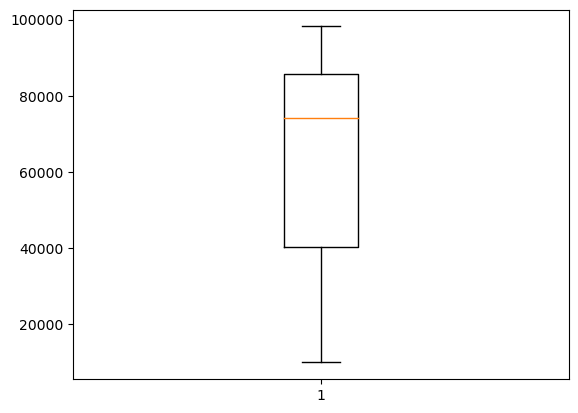

In [11]:
plt.boxplot(data['Zip Code'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22a5a695750>,
 'caps': [<matplotlib.lines.Line2D at 0x22a5a697090>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a5a665d10>],
 'medians': [<matplotlib.lines.Line2D at 0x22a5a6a47d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a534a9310>],
 'means': []}

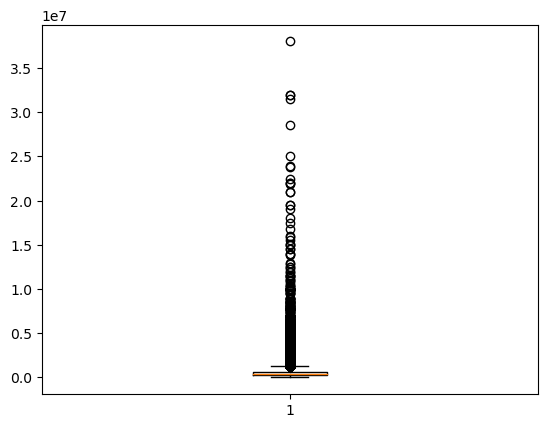

In [12]:
plt.boxplot(data['Price'])

In [13]:
Q1 = data.Price.quantile(0.25)
Q3 = data.Price.quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_index = np.where(data['Price'] >= upper)[0]
lower_index = np.where(data['Price'] <= lower)[0]

data.drop(index = upper_index, inplace = True)
data.drop(index = lower_index, inplace = True)


265000.0 674990.0 409990.0


In [14]:
data

,Zip Code,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
3,10014,760000.0,3,2,1538,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
5,10017,764900.0,1,1,643,New York,New York,15514,20107.7,New York,188289.0,40.75235,-73.97260
8,10026,540000.0,2,1,750,New York,New York,39401,39689.7,New York,117438.0,40.80302,-73.95348
9,10026,570000.0,1,1,589,New York,New York,39401,39689.7,New York,117438.0,40.80302,-73.95348
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39973,98199,1075000.0,3,2,2500,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39974,98199,948000.0,3,2,2160,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39978,98199,950000.0,3,2,1380,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39979,98199,425000.0,2,1,856,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


{'whiskers': [<matplotlib.lines.Line2D at 0x22a5a70e310>,
 'caps': [<matplotlib.lines.Line2D at 0x22a59673d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a5a70dad0>],
 'medians': [<matplotlib.lines.Line2D at 0x22a599d0890>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a599d1250>],
 'means': []}

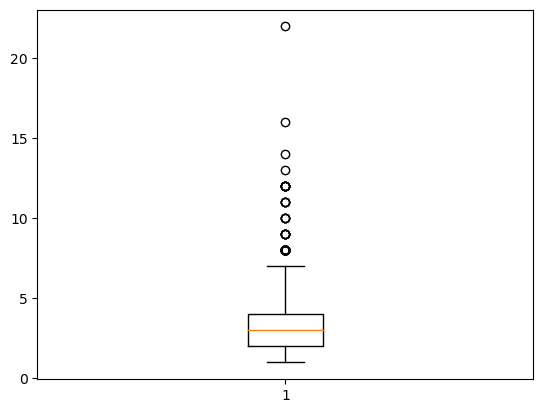

In [15]:
plt.boxplot(data['Beds'])

In [16]:
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

In [17]:
Q1 = data.Beds.quantile(0.25)
Q3 = data.Beds.quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_index = np.where(data['Beds'] >= upper)[0]
lower_index = np.where(data['Beds'] <= lower)[0]

data.drop(index = upper_index, inplace = True)
data.drop(index = lower_index, inplace = True)


2.0 4.0 2.0


{'whiskers': [<matplotlib.lines.Line2D at 0x22a59a24490>,
 'caps': [<matplotlib.lines.Line2D at 0x22a599dbd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a59a1b810>],
 'medians': [<matplotlib.lines.Line2D at 0x22a59a27250>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a59a27d90>],
 'means': []}

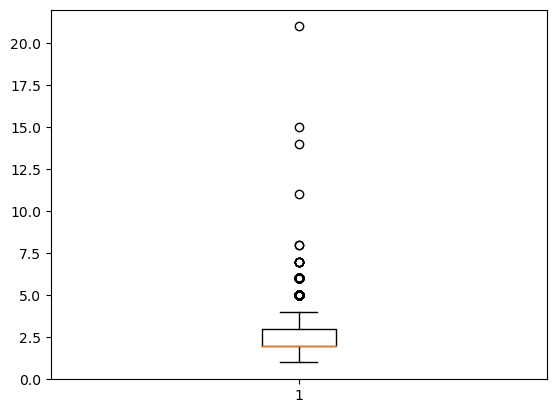

In [18]:
plt.boxplot(data['Baths'])

In [19]:
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

In [20]:
Q1 = data.Baths.quantile(0.25)
Q3 = data.Baths.quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_index = np.where(data['Baths'] >= upper)[0]
lower_index = np.where(data['Baths'] <= lower)[0]

data.drop(index = upper_index, inplace = True)
data.drop(index = lower_index, inplace = True)


2.0 3.0 1.0


In [21]:
data

,Zip Code,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10014,760000.0,3,2,1538,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
1,10014,1100000.0,1,1,600,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
2,10017,764900.0,1,1,643,New York,New York,15514,20107.7,New York,188289.0,40.75235,-73.97260
3,10026,540000.0,2,1,750,New York,New York,39401,39689.7,New York,117438.0,40.80302,-73.95348
4,10026,570000.0,1,1,589,New York,New York,39401,39689.7,New York,117438.0,40.80302,-73.95348
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36257,98199,1075000.0,3,2,2500,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
36258,98199,948000.0,3,2,2160,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
36259,98199,950000.0,3,2,1380,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
36260,98199,425000.0,2,1,856,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


{'whiskers': [<matplotlib.lines.Line2D at 0x22a59a9dfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x22a59a9f1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a59a9d850>],
 'medians': [<matplotlib.lines.Line2D at 0x22a59ab0550>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a59ab0e90>],
 'means': []}

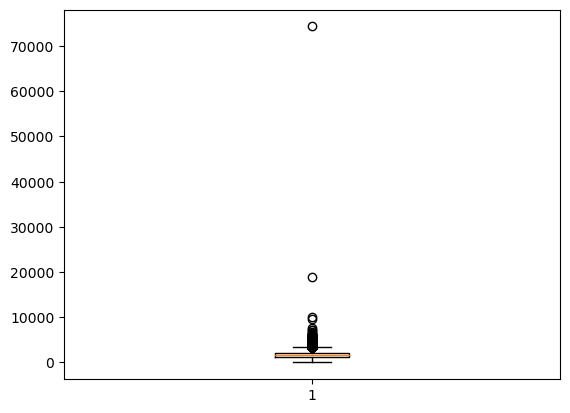

In [22]:
plt.boxplot(data['Living Space'])

In [23]:
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

In [24]:
Q1 = data['Living Space'].quantile(0.25)
Q3 = data['Living Space'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_index = np.where(data['Living Space'] >= upper)[0]
lower_index = np.where(data['Living Space'] <= lower)[0]

data.drop(index = upper_index, inplace = True)
data.drop(index = lower_index, inplace = True)


1164.0 2075.0 911.0


In [25]:
data

,Zip Code,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10014,760000.0,3,2,1538,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
1,10014,1100000.0,1,1,600,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
2,10017,764900.0,1,1,643,New York,New York,15514,20107.7,New York,188289.0,40.75235,-73.97260
3,10026,540000.0,2,1,750,New York,New York,39401,39689.7,New York,117438.0,40.80302,-73.95348
4,10026,570000.0,1,1,589,New York,New York,39401,39689.7,New York,117438.0,40.80302,-73.95348
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35652,98199,1075000.0,3,2,2500,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
35653,98199,948000.0,3,2,2160,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
35654,98199,950000.0,3,2,1380,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
35655,98199,425000.0,2,1,856,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


{'whiskers': [<matplotlib.lines.Line2D at 0x22a5a765490>,
 'caps': [<matplotlib.lines.Line2D at 0x22a5a765b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a5a764b90>],
 'medians': [<matplotlib.lines.Line2D at 0x22a5a767850>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a599f0110>],
 'means': []}

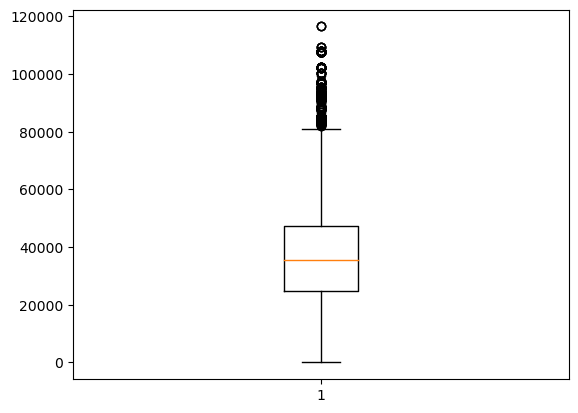

In [26]:
plt.boxplot(data['Zip Code Population'])

In [27]:
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

In [28]:
Q1 = data['Zip Code Population'].quantile(0.25)
Q3 = data['Zip Code Population'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_index = np.where(data['Zip Code Population'] >= upper)[0]
lower_index = np.where(data['Zip Code Population'] <= lower)[0]

data.drop(index = upper_index, inplace = True)
data.drop(index = lower_index, inplace = True)


24769.0 47471.0 22702.0


In [29]:
data

,Zip Code,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10014,760000.0,3,2,1538,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
1,10014,1100000.0,1,1,600,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
2,10017,764900.0,1,1,643,New York,New York,15514,20107.7,New York,188289.0,40.75235,-73.97260
3,10026,540000.0,2,1,750,New York,New York,39401,39689.7,New York,117438.0,40.80302,-73.95348
4,10026,570000.0,1,1,589,New York,New York,39401,39689.7,New York,117438.0,40.80302,-73.95348
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34709,98199,1075000.0,3,2,2500,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
34710,98199,948000.0,3,2,2160,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
34711,98199,950000.0,3,2,1380,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
34712,98199,425000.0,2,1,856,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


{'whiskers': [<matplotlib.lines.Line2D at 0x22a5a7ca050>,
 'caps': [<matplotlib.lines.Line2D at 0x22a5a7cb390>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a5a7c9750>],
 'medians': [<matplotlib.lines.Line2D at 0x22a5a7d8490>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a5a752a10>],
 'means': []}

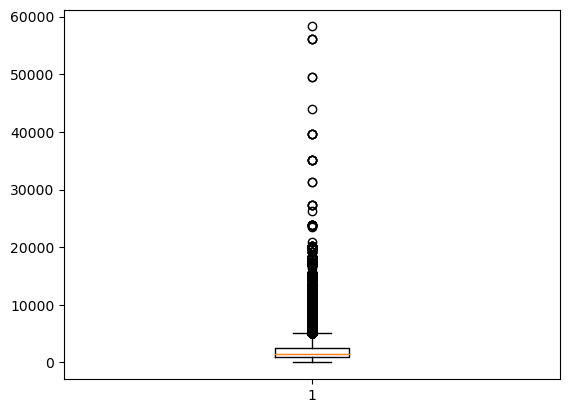

In [30]:
plt.boxplot(data['Zip Code Density'])

In [31]:
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

In [32]:
Q1 = data['Zip Code Density'].quantile(0.25)
Q3 = data['Zip Code Density'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_index = np.where(data['Zip Code Density'] >= upper)[0]
lower_index = np.where(data['Zip Code Density'] <= lower)[0]

data.drop(index = upper_index, inplace = True)
data.drop(index = lower_index, inplace = True)


888.5 2556.4 1667.9


In [33]:
data

,Zip Code,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
13,10301,950000.0,6,2,1920,Staten Island,New York,38736,3980.1,Richmond,118113.0,40.62803,-74.09564
14,10301,750000.0,4,2,1853,Staten Island,New York,38736,3980.1,Richmond,118113.0,40.62803,-74.09564
15,10301,1148888.0,4,3,1980,Staten Island,New York,38736,3980.1,Richmond,118113.0,40.62803,-74.09564
16,10301,998000.0,3,1,2288,Staten Island,New York,38736,3980.1,Richmond,118113.0,40.62803,-74.09564
17,10301,849000.0,4,2,2511,Staten Island,New York,38736,3980.1,Richmond,118113.0,40.62803,-74.09564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33886,98199,1075000.0,3,2,2500,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
33887,98199,948000.0,3,2,2160,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
33888,98199,950000.0,3,2,1380,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
33889,98199,425000.0,2,1,856,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


{'whiskers': [<matplotlib.lines.Line2D at 0x22a59c6ba50>,
 'caps': [<matplotlib.lines.Line2D at 0x22a59c78dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a59c6b210>],
 'medians': [<matplotlib.lines.Line2D at 0x22a59c79ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a59c7a790>],
 'means': []}

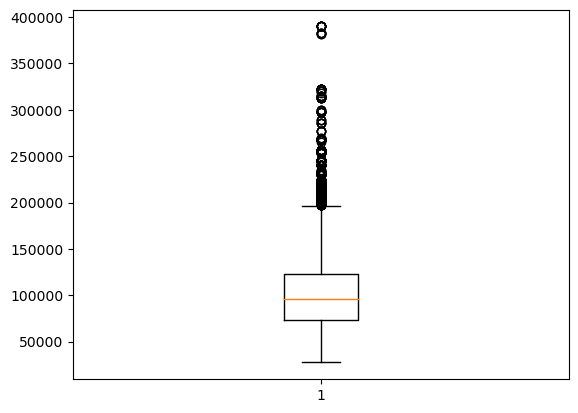

In [34]:
plt.boxplot(data['Median Household Income'])

In [35]:
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

In [36]:
Q1 = data['Median Household Income'].quantile(0.25)
Q3 = data['Median Household Income'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_index = np.where(data['Median Household Income'] >= upper)[0]
lower_index = np.where(data['Median Household Income'] <= lower)[0]

data.drop(index = upper_index, inplace = True)
data.drop(index = lower_index, inplace = True)


73212.0 122666.0 49454.0


In [37]:
data

,Zip Code,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10301,950000.0,6,2,1920,Staten Island,New York,38736,3980.1,Richmond,118113.0,40.62803,-74.09564
1,10301,750000.0,4,2,1853,Staten Island,New York,38736,3980.1,Richmond,118113.0,40.62803,-74.09564
2,10301,1148888.0,4,3,1980,Staten Island,New York,38736,3980.1,Richmond,118113.0,40.62803,-74.09564
3,10301,998000.0,3,1,2288,Staten Island,New York,38736,3980.1,Richmond,118113.0,40.62803,-74.09564
4,10301,849000.0,4,2,2511,Staten Island,New York,38736,3980.1,Richmond,118113.0,40.62803,-74.09564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31310,98178,750000.0,3,2,2880,Seattle,Washington,26282,2070.4,King,133779.0,47.49921,-122.24735
31311,98178,485000.0,3,1,1230,Seattle,Washington,26282,2070.4,King,133779.0,47.49921,-122.24735
31312,98178,625000.0,2,2,1010,Seattle,Washington,26282,2070.4,King,133779.0,47.49921,-122.24735
31313,98178,899900.0,4,3,2274,Seattle,Washington,26282,2070.4,King,133779.0,47.49921,-122.24735


{'whiskers': [<matplotlib.lines.Line2D at 0x22a59cd3310>,
 'caps': [<matplotlib.lines.Line2D at 0x22a59ce46d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a59cd29d0>],
 'medians': [<matplotlib.lines.Line2D at 0x22a59ce5690>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a59cd3c90>],
 'means': []}

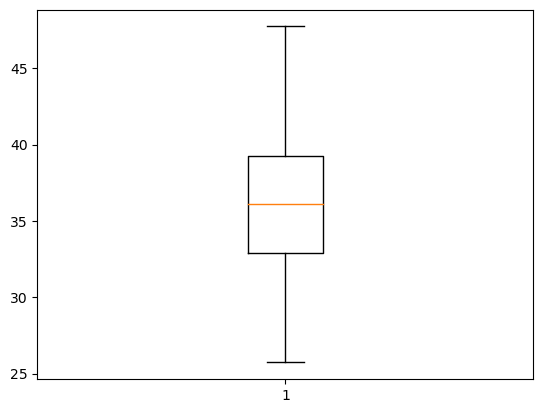

In [38]:
plt.boxplot(data['Latitude'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22a59d4c450>,
 'caps': [<matplotlib.lines.Line2D at 0x22a59d4dc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a59d3f950>],
 'medians': [<matplotlib.lines.Line2D at 0x22a59d4f390>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a59d4fe10>],
 'means': []}

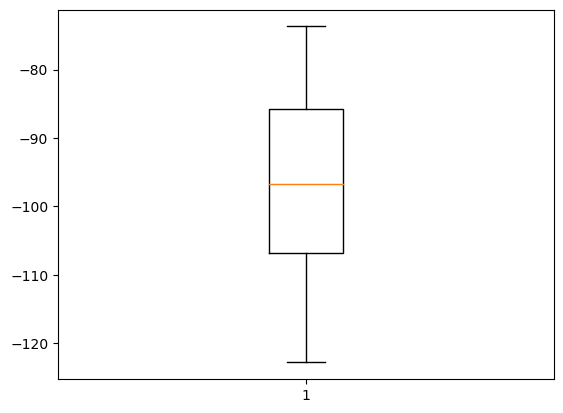

In [39]:
plt.boxplot(data['Longitude'])

In [40]:
data

,Zip Code,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10301,950000.0,6,2,1920,Staten Island,New York,38736,3980.1,Richmond,118113.0,40.62803,-74.09564
1,10301,750000.0,4,2,1853,Staten Island,New York,38736,3980.1,Richmond,118113.0,40.62803,-74.09564
2,10301,1148888.0,4,3,1980,Staten Island,New York,38736,3980.1,Richmond,118113.0,40.62803,-74.09564
3,10301,998000.0,3,1,2288,Staten Island,New York,38736,3980.1,Richmond,118113.0,40.62803,-74.09564
4,10301,849000.0,4,2,2511,Staten Island,New York,38736,3980.1,Richmond,118113.0,40.62803,-74.09564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31310,98178,750000.0,3,2,2880,Seattle,Washington,26282,2070.4,King,133779.0,47.49921,-122.24735
31311,98178,485000.0,3,1,1230,Seattle,Washington,26282,2070.4,King,133779.0,47.49921,-122.24735
31312,98178,625000.0,2,2,1010,Seattle,Washington,26282,2070.4,King,133779.0,47.49921,-122.24735
31313,98178,899900.0,4,3,2274,Seattle,Washington,26282,2070.4,King,133779.0,47.49921,-122.24735


In [41]:
le_city = LabelEncoder()
data['City'] = le_city.fit_transform(data['City'])

le_state = LabelEncoder()
data['State'] = le_state.fit_transform(data['State'])

le_country = LabelEncoder()
data['County'] = le_country.fit_transform(data['County'])

In [42]:
data

,Zip Code,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10301,950000.0,6,2,1920,165,18,38736,3980.1,66,118113.0,40.62803,-74.09564
1,10301,750000.0,4,2,1853,165,18,38736,3980.1,66,118113.0,40.62803,-74.09564
2,10301,1148888.0,4,3,1980,165,18,38736,3980.1,66,118113.0,40.62803,-74.09564
3,10301,998000.0,3,1,2288,165,18,38736,3980.1,66,118113.0,40.62803,-74.09564
4,10301,849000.0,4,2,2511,165,18,38736,3980.1,66,118113.0,40.62803,-74.09564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31310,98178,750000.0,3,2,2880,160,27,26282,2070.4,46,133779.0,47.49921,-122.24735
31311,98178,485000.0,3,1,1230,160,27,26282,2070.4,46,133779.0,47.49921,-122.24735
31312,98178,625000.0,2,2,1010,160,27,26282,2070.4,46,133779.0,47.49921,-122.24735
31313,98178,899900.0,4,3,2274,160,27,26282,2070.4,46,133779.0,47.49921,-122.24735


In [43]:
x = data.drop('Price', axis = 1)
y = data['Price']

In [55]:
x

,Zip Code,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10301,6,2,1920,165,18,38736,3980.1,66,118113.0,40.62803,-74.09564
1,10301,4,2,1853,165,18,38736,3980.1,66,118113.0,40.62803,-74.09564
2,10301,4,3,1980,165,18,38736,3980.1,66,118113.0,40.62803,-74.09564
3,10301,3,1,2288,165,18,38736,3980.1,66,118113.0,40.62803,-74.09564
4,10301,4,2,2511,165,18,38736,3980.1,66,118113.0,40.62803,-74.09564
...,...,...,...,...,...,...,...,...,...,...,...,...
31310,98178,3,2,2880,160,27,26282,2070.4,46,133779.0,47.49921,-122.24735
31311,98178,3,1,1230,160,27,26282,2070.4,46,133779.0,47.49921,-122.24735
31312,98178,2,2,1010,160,27,26282,2070.4,46,133779.0,47.49921,-122.24735
31313,98178,4,3,2274,160,27,26282,2070.4,46,133779.0,47.49921,-122.24735


In [56]:
y

0         950000.0
1         750000.0
2        1148888.0
3         998000.0
4         849000.0
           ...    
31310     750000.0
31311     485000.0
31312     625000.0
31313     899900.0
31314     388000.0
Name: Price, Length: 30416, dtype: float64

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=23)

In [58]:
x_train.shape, x_test.shape

((24332, 12), (6084, 12))

In [59]:
y_train.shape, y_test.shape

((24332,), (6084,))

In [61]:
model = LinearRegression()
model.fit(x_train, y_train) 

LinearRegression()

In [62]:
model.coef_

array([-5.79568569e+00,  2.27644313e+03,  3.69826223e+04,  1.24287535e+02,
       -1.17363045e+01, -4.62307768e+02, -5.36502436e-01,  6.03813993e+01,
        3.24194564e+02,  2.57642196e+00, -9.33368775e+03, -1.34535046e+04])

In [63]:
model.intercept_

-834462.4304856263

In [64]:
model.score(x_train, y_train)

0.5846088293781191

In [65]:
model.score(x_test, y_test)

0.5810408841451813

In [66]:
y_pred = model.predict(x_test)

In [67]:
pd.DataFrame({'True values': y_test, 'Predicted values': y_pred})

,True values,Predicted values
9049,149500.0,96619.028097
2473,355000.0,331644.196993
10893,399900.0,464408.158993
17789,260000.0,376161.534019
26147,319985.0,306655.488204
...,...,...
1814,949000.0,632398.013234
20592,499900.0,380444.522807
16276,457900.0,645968.757941
14532,365000.0,439634.998041


In [68]:
mean_absolute_error(y_test, y_pred)

108812.93717089893

In [69]:
mean_squared_error(y_test, y_pred)

21779510415.256054